<a href="https://colab.research.google.com/github/ArthurCalvi/Classifieur-Bois/blob/master/Neural_Net_Wood_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification du bois : prédiction d'une image**

Dans ce Notebook, un réseau de neurones déjà entrainé capable de distinguer des images de bois sains *(sans défaut)*  d'images de bois contenant des défauts *(échauffures, noeuds morts, noeuds vifs, poches de résine et fentes)* est chargé. 

Ce classifieur binaire possède un taux de précision avoisinant les 94% et a été entraîné sur une base de données de 400 images contenant plus de 200 essences de bois. Bien que la base de données soit limitée en taille, le réseau de neurones est capable de généraliser à d'autres bases de données de façon satisfaisante. Cette bonne généralisation est dû : 


1.   La grande variété d'essence de la base de données. 
2.   L'augmentation artificielle opérée durant la phase d'apprentissage.
3.   L'augmentation artificielle opérée durant la prédiction. 

*PS : Attention pour qu'un script du notebook marche il faut que les scripts précédents aient été lancés.*


**Partie 0 - Accès au Drive** 

Dans cette partie nous définissons l'accès à un Drive où sont stockés : 

1.   Le modèle du réseau de neurones.
2.   Certaines fonctions utiles pour l'augmentation.
3.   La base de données a prédire. 



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%pwd 

'/content'

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd 'My Drive'
%pwd

[Errno 2] No such file or directory: 'My Drive'
/content


'/content'

**Partie 1 - Import des bibliotèques**

L'API https://keras.io/ a été choisie pour réaliser le réseau de neurones. Bien que ce ne soit pas l'API la plus utilisée maintenant (Il s'agit de : https://pytorch.org/), il s'agit de l'API la plus vieille sur le marché : la littérature ne manque pas à son sujet ! 

In [ ]:

import random as rd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Import des bibliothèques os et sys pour manipuler les fichiers
import os, sys

sys.path.insert(0,'/content/drive/My Drive/Classification_Bois')

#Personal 
from custom_functions_v1 import crop_generator, random_crop, colorize_v2

# Keras API
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.models import load_model


**Partie 2 - Chargement du modèle**

Le modèle a été entrainée auparavant : l'architecture, les hyperparamètres ainsi que les paramètres sont stockés dans un fichier.

In [ ]:
model = load_model('/content/drive/My Drive/Classification_Bois/MODEL_CNN1_bs32_ep100_augTrue_t1593511641.h5')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)       

**Partie 3 - Fonction de prédiction**

Dans cette partie la fonction prediction est définie. Cette fonction prédit la classe d'appartenance d'une image à partir de plusieurs versions de cette image crées par augmentation artificielle aléatoire. Le caractère aléatoire de la prédiction fait que la probabilité qu'une image soit telle classe peut légèrement varier en faisant plusieurs tentatives. 




In [ ]:

def prediction(img,nbr_images):
    """ 
    Réalise la prédiction de [img] à partir de [nbr_images] augmentées
    
    INPUT :
        img : array chargé avec load_img 
        nbr_images : entier représentant le nombre d'images augmentées utilisées
        pour la prédiction 
        
        
    OUTPUT :
        prediction : prediction finale moyennée sur plusieurs images
    """
    
    # convert to numpy array
    data = img_to_array(img)
    # expand dimension to one sample
    samples = np.expand_dims(data, 0)
    
    # create data for the test
    datagen = ImageDataGenerator( fill_mode='reflect', 
                                  samplewise_center=True,
                                  samplewise_std_normalization=True,
                                  horizontal_flip=True, vertical_flip=True, 
                                  rotation_range=10, brightness_range= [0.6,1.4], 
                                  preprocessing_function = colorize_v2, 
                                  zoom_range = [1.0,1.3])
    
    batch = datagen.flow(samples, batch_size=1)
    
    #add random cropped
    prediction = []
    
    for i in range(nbr_images):
        
        img = batch.next()
        img = random_crop(img[0].astype('float32'), (224,224))
        img = np.expand_dims(img, 0)
        prediction.append(model.predict(img))
    
        
    prediction = sum(prediction)/nbr_images
    prediction = np.array(prediction).tolist()[0][0]
    
    return prediction  



**Partie 4 - A vous de jouer !**

Dans cette partie vous pouvez prédire la classe d'une image que vous avez placé dans le drive en respectant le protocole décrit ici : https://colab.research.google.com/drive/13-HSbLVSKjOFNxfxGnTD0467jFf4Dhcv?usp=sharing. 

Il faut renseigner : 

1.   name_img : le nom de l'image à prédire qui se trouve dans le dossier Images_to_predict *(ne pas oublier l'extension .jpg)*. 
2.   nbr_images : le nombre d'images augmentées crées pour prédire la classe de l'image. ex: nbr_images = 10. 



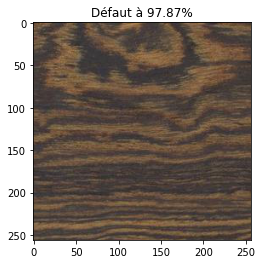

In [ ]:
name_img = 'clearwood_256_230.jpg'
nbr_images = 10

path = '/content/drive/My Drive/Classification_Bois/IMAGES_préparées/'
img = load_img(path+name_img)
score = prediction(img, nbr_images)
img = mpimg.imread(path+name_img)

#revoir proba
if score>0.5:
    plt.imshow(img)
    plt.title('Défaut à {0:.2%}'.format(score))
else : 
    plt.imshow(img)
    plt.title('Bois sain à {0:.2%}'.format(1-score))

